# Week 3 Assignment 4
##### Team 5

#### The dataset, collected by Davis et al in the 1930s, shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise. http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis

#### Goal: Make inferences about the relationships between (1) the women, and (2) the social events. 

### Import data and plot

In [14]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import math
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.davis_southern_women_graph()
women = ["Evelyn Jefferson",
             "Laura Mandeville",
             "Theresa Anderson",
             "Brenda Rogers",
             "Charlotte McDowd",
             "Frances Anderson",
             "Eleanor Nye",
             "Pearl Oglethorpe",
             "Ruth DeSand",
             "Verne Sanderson",
             "Myra Liddel",
             "Katherina Rogers",
             "Sylvia Avondale",
             "Nora Fayette",
             "Helen Lloyd",
             "Dorothy Murchison",
             "Olivia Carleton",
             "Flora Price"]
clubs = ["E1",
              "E2",
              "E3",
              "E4",
              "E5",
              "E6",
              "E7",
              "E8",
              "E9",
              "E10",
              "E11",
              "E12",
              "E13",
              "E14"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))

Biadjacency matrix
[[ 1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.

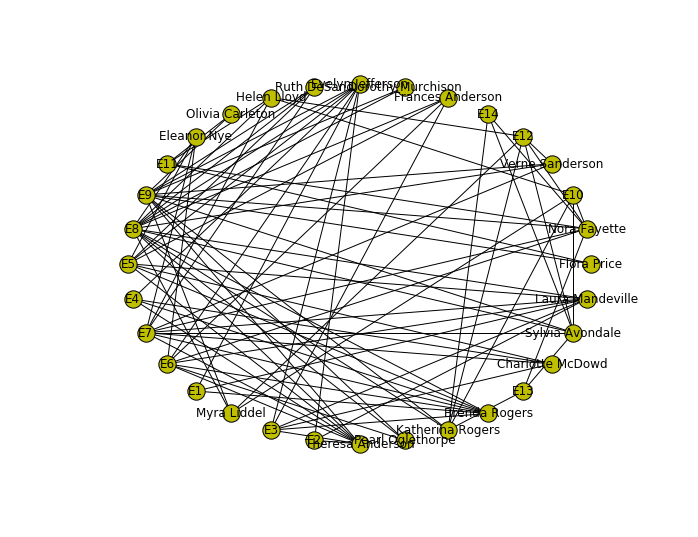

In [15]:
plt.figure(figsize=(9,7))
nx.draw_circular(G, with_labels=True, node_color="y")

##### Plot relationship between women

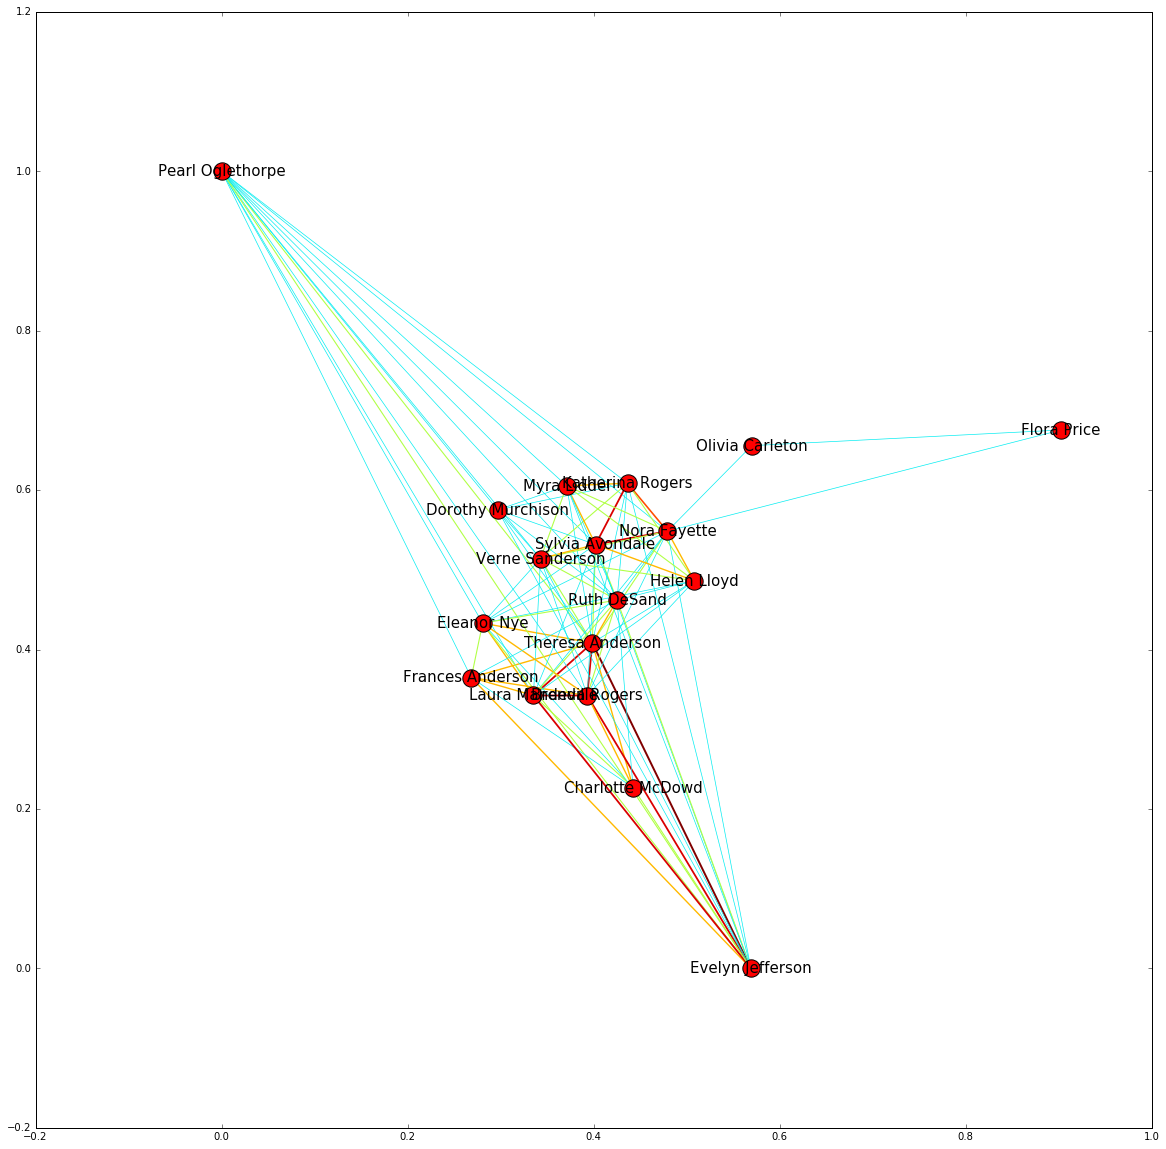

In [61]:
# Graph of women (with weighted interactions)
plt.figure(figsize=(20,20))
womnet = bipartite.weighted_projected_graph(G, women, ratio=False)
weights = [math.log(edata['weight']) for f,t,edata in womnet.edges(data=True)]
womplot = nx.draw_networkx(womnet,width=weights, edge_color=weights, font_size=15)
womplot

(array([ 44.,   0.,   0.,  49.,   0.,  22.,   0.,  15.,   1.,   8.]),
 array([ 0.        ,  0.19459101,  0.38918203,  0.58377304,  0.77836406,
         0.97295507,  1.16754609,  1.3621371 ,  1.55672812,  1.75131913,
         1.94591015]),
 <a list of 10 Patch objects>)

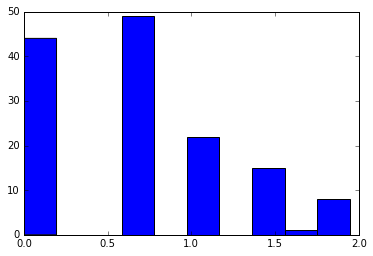

In [52]:
# In order to see the clusters, we must trim the individuals that are more "free-floaters". I'm looking at you, Flora.
# Then, we create a histogram where we see the weight each individual has in relation to others before plotting our new clusters
def trim_edges(G, weight=1):
    NewG = nx.Graph()
    for f, to, edata in G.edges(data=True):
        if edata['weight'] > weight:
            NewG.add_edge(f,to,edata)
    return NewG
plt.hist(weights)

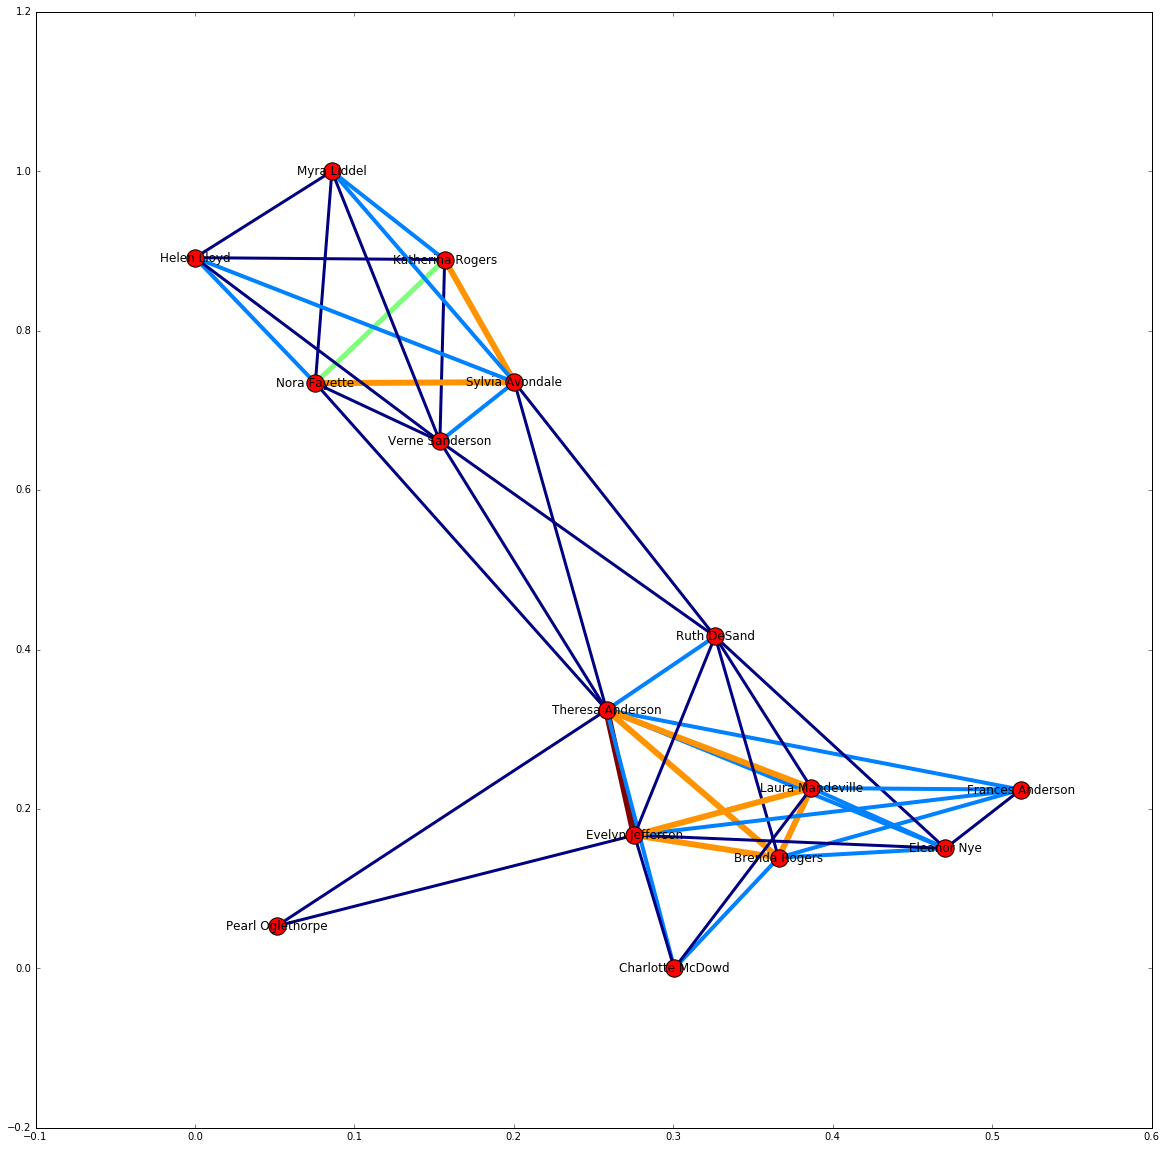

In [65]:
# Now that we know what our weights are, we plot the new cluster graph
plt.figure(figsize=(20,20))
trimmed_plot = trim_edges(womnet, weight=math.exp(0.9))
weights = [edata['weight'] for f,t,edata in trimmed_plot.edges(data=True)]
nx.draw_networkx(trimmed_plot,width=weights, edge_color=weights)

##### Plot relationship between clubs

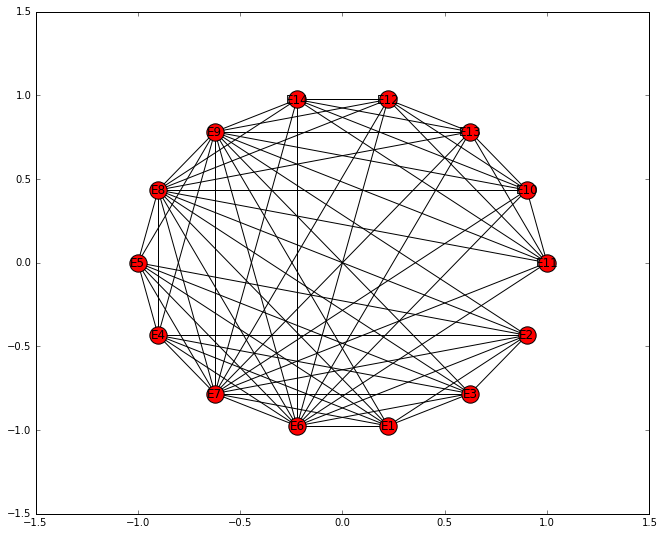

In [19]:
plt.figure(figsize=(11,9))
clubnet = bipartite.weighted_projected_graph(G, clubs, ratio=False)
clubplot = nx.draw_networkx(clubnet,pos=nx.shell_layout(clubnet))
clubplot

##### Find the number of triangles that include a node as one vertex

In [20]:
# Self loops are ignored
# Women triangles
nx.triangles(womnet)

{'Brenda Rogers': 101,
 'Charlotte McDowd': 55,
 'Dorothy Murchison': 112,
 'Eleanor Nye': 101,
 'Evelyn Jefferson': 122,
 'Flora Price': 66,
 'Frances Anderson': 101,
 'Helen Lloyd': 122,
 'Katherina Rogers': 112,
 'Laura Mandeville': 101,
 'Myra Liddel': 112,
 'Nora Fayette': 122,
 'Olivia Carleton': 66,
 'Pearl Oglethorpe': 112,
 'Ruth DeSand': 122,
 'Sylvia Avondale': 122,
 'Theresa Anderson': 122,
 'Verne Sanderson': 122}

In [21]:
# Club triangles
nx.triangles(clubnet)

{'E1': 28,
 'E10': 28,
 'E11': 28,
 'E12': 28,
 'E13': 28,
 'E14': 28,
 'E2': 28,
 'E3': 28,
 'E4': 28,
 'E5': 28,
 'E6': 53,
 'E7': 53,
 'E8': 53,
 'E9': 53}

##### Create table with degree, degree centrality, closeness centrality, betweenness centrality and eigenvecture centrality for women

In [22]:
# Function where you enter the graph (either women nodes or club nodes, and it returns the table)
def CentralTable(graph):
    degr = nx.degree(graph)
    degc = nx.degree_centrality(graph)
    betwc = nx.betweenness_centrality(graph)
    closec = nx.closeness_centrality(graph)
    eigenc = nx.eigenvector_centrality_numpy(graph)
    
    table = [[name,degr[name], round(degc[name],3), round(betwc[name],3), round(closec[name],3), round(eigenc[name],3)] for name in graph.nodes()]
    table = sorted(table,key = lambda x: -x[2])
    centable = PrettyTable(['Name','Degree','Degree Centrality','Betweenness','Closeness','Eigenvector'])
    
    for i in range(0, len(table)):
        centable.add_row(table[i])
    return centable

In [23]:
print(CentralTable(womnet))

+-------------------+--------+-------------------+-------------+-----------+-------------+
|        Name       | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+-------------------+--------+-------------------+-------------+-----------+-------------+
|  Theresa Anderson |   17   |        1.0        |     0.01    |    1.0    |    0.354    |
|    Nora Fayette   |   17   |        1.0        |     0.01    |    1.0    |    0.253    |
|  Sylvia Avondale  |   17   |        1.0        |     0.01    |    1.0    |    0.273    |
|  Verne Sanderson  |   17   |        1.0        |     0.01    |    1.0    |    0.231    |
|    Ruth DeSand    |   17   |        1.0        |     0.01    |    1.0    |    0.249    |
|  Evelyn Jefferson |   17   |        1.0        |     0.01    |    1.0    |    0.319    |
|    Helen Lloyd    |   17   |        1.0        |     0.01    |    1.0    |    0.207    |
|  Pearl Oglethorpe |   16   |       0.941       |    0.005    |   0.944   |    0.194    |

##### Create table with degree, degree centrality, closeness centrality, betweenness centrality and eigenvecture centrality for clubs

In [24]:
print(CentralTable(clubnet))

+------+--------+-------------------+-------------+-----------+-------------+
| Name | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+------+--------+-------------------+-------------+-----------+-------------+
|  E9  |   13   |        1.0        |     0.08    |    1.0    |    0.352    |
|  E8  |   13   |        1.0        |     0.08    |    1.0    |    0.453    |
|  E7  |   13   |        1.0        |     0.08    |    1.0    |    0.377    |
|  E6  |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
| E11  |   8    |       0.615       |     0.0     |   0.722   |    0.101    |
| E10  |   8    |       0.615       |     0.0     |   0.722   |    0.187    |
| E13  |   8    |       0.615       |     0.0     |   0.722   |    0.132    |
| E12  |   8    |       0.615       |     0.0     |   0.722   |    0.216    |
| E14  |   8    |       0.615       |     0.0     |   0.722   |    0.132    |
|  E5  |   8    |       0.615       |     0.0     |   0.722   | 

#### Conclusion 

##### Friends/Members initial data:

Looking at the adjancency matrix, we can broadly observe some quick general patterns: the upper left corner, the middle portion, and the lower right corner. These patterns may hint at clustering. Also, looking at each member and how many friends they have versus how many meetings they attend that have friends, it isn't too much to assume that certain individuals have more sway over a large group of the women (like Evelyn with Friends: 17 and Meetings: 50) or some that are not as involved (like Flora with Friends: 12 and Meetings: 14). Flora, in particular (due to her number of meetings being close to her number of friends) may imply that certain individuals only attend meetings with friends, which in turn implies clustering. 

##### Plot between women:

Before Weights:

We can see that Evelyn and Pearl are two of individuals with many connections (Evelyn having more strong ties to some individuals than Pearl, who seems to be loosely tied to many people). A very weak triad is formed between the individuals Flora, Olivia and Nora, so it may be implied that at least two of these women probably attend few enough meetings that they are only linked loosely together with one another. Further more, the coloring (dark red lines) in the core of the graph (the central, tangled portion of relationships) may indicate that these women, because they are linked to well-connected individuals may be central figures or part of cliques within the group.

After Weights:

Removing the less-involved individuals (Flora and Olivia), the weights allow us to better see the interaction importance among the rest of the group. There appear to be two primary groups within the women (could be indicative of a formal organization of those groups of women, or perhaps subtle relationship differences, cliques). Within one group, the individuals that are closest to each other are Evelyn, Theresa, Brenda and Laura and in the other Nora, Sylvia and Katherine (though it appears more that Katherine and Nora are close because they are both linked to Sylvia. Each group has someone who is in contact with a member from the other group (Theresa and Ruth are the mediators for one team and Verne and Sylvia in the other, though Nora does have one contact with Theresa). In the first team, Pearl seems to be a bit of an outlier in that she only has contact with Theresa (who by now is assumed to be a central figure) and Evelyn (another assumed central figure). In the pre-weight plot, she only had loose connections with the other individuals, which may imply that she is new or that she even does not like attending.

##### Plot between clubs: 

E2 and E11 are unique in that they did not share any attendees, but they also were associated with events that tended to share less attendees. Overall, though, the clubs seem to share an almost equal amount of attendees among themselves.

##### Triads:
Women: 

There appear to be primarily three groups of triangles for women: below 100, approximately 100 and above 100. The first group has values of 66 and 55, the second 101 and 112 and the third 122. This shows that certain individuals are more connected and involved with more individuals than others. At the bottom of the triangle list are Flora, Charlotte and Olivia and at the top are Theresa, Verne, Sylvia, Ruth, Nora, Helen and Evelyn. Out of the Low List, Charlotte is a surprise because she seemed well-connected in the weighted graph, which may imply that she is close to only a small group of people. Out of the Top List, Helen is a surprise because we hadn't paid as much attention to her before. However, looking back on her position within her group, she is well-connected with many members, even if she does not mediate between the two groups. Seeing how the more communicative individuals are in the first team, it may also be implied that these individuals are more social or are participants in clubs that involve outreach.

Clubs: 

The majority of the clubs are equally connected, shown by how the number of triangles to include a club node as a vertex is consistantly 28. However, four clubs (E6-E9) had higher (and equal among themselves) numbers of triangles, showing that they have more member overlap than the other clubs. If someone wished to pass a message to as many women as possible with one try, one of these four clubs would be the one to attend.

##### Table for women:

Because the centrality scores were so close among the women, it may be more beneficial to look at the individuals with overall top and low centrality scores across the board. Doing this, it becomes more apparent that the women were overall well-connected and unlikely to not share information (high degree centrality) but that it was unlikely to find one individual that acted as a "bridge" to a group or team (low betweenness centrality). It is more likely that because the individuals with high degree degree reached out to as many members as possible (ex. Theresa linked to Pearl), that the closeness centrality was also high (even for the individuals in the Low List: Flora, Olivia and Charlotte). As such, each individual was "close" to all other individuals within the network. As far as eigenvector centrality is concerned, it was low. This either means that each individual was not close to a central figure, despite having a short path to them (high closeness centrality), or that how "central" the position even the most well-connected individuals held was not high enough to raise the eigenvector measure.

Most "central" individual: Theresa Andersan

Least "central" individuals: Flora Price, Olivia Carleton

##### Table for clubs:

E6-E9 exhibited the greatest degree of centrality uniformly. These events included attendees from both of the 2 main "cliques" observed earlier. The other events had lesser centrality due to the fact that they were more (although not completely) localized among their respective cliques. That being said, if one was to attempt and reach out to as many women as possible in a single try, out of the four clubs (E6-E9), the one to pick due it's highest centrality measures overall would be E8.